<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Ranosz_testowy/pum_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# test
url = 'https://raw.githubusercontent.com/UEPP40/PUM/Ranosz_testowy/train.csv'
df1 = pd.read_csv(url, sep=",")
df1.head()

<ipython-input-74-6d10735291bd>:11: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(url, sep=",")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df1.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
#sprawdź liczbę kolumn i wierszy df.shape df.info()
#wyświetl część tabeli df_train.head()
#usuń wiersze z duplikatami id df.drop_duplicates(subset="ID", inplace=True)

In [ ]:
df1.drop(columns = ['ID','Customer_ID', 'Name', 'SSN'], inplace = True)
df1.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [ ]:
df1["Age"] = pd.to_numeric(df1["Age"].str.replace("_",""))
df1["Annual_Income"] = pd.to_numeric(df1["Annual_Income"].str.replace("_",""))

df1.dtypes

# object = string dla pandasa


# df1[["Age"]] = df1[["Age"]].to_string()
# df1.dtypes
# df = df.astype({col: 'string' for col in df.select_dtypes(['object']).columns})
# print(df.dtypes)

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [ ]:
df1["Num_of_Loan"].head()
df1["Num_of_Loan"] = pd.to_numeric(df1["Num_of_Loan"].str.replace("_",""))
df1.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [ ]:
df1["Type_of_Loan"].head()

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1    Auto Loan, Credit-Builder Loan, Personal Loan,...
2    Auto Loan, Credit-Builder Loan, Personal Loan,...
3    Auto Loan, Credit-Builder Loan, Personal Loan,...
4    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object

In [ ]:
df1["Num_of_Delayed_Payment"].head()

0      7
1    NaN
2      7
3      4
4    NaN
Name: Num_of_Delayed_Payment, dtype: object

In [ ]:
df1["Num_of_Delayed_Payment"] = pd.to_numeric(df1["Num_of_Delayed_Payment"].str.replace("_",""))
# nie wiadomo czy to dobrze
# df1["Num_of_Delayed_Payment"] = pd.to_numeric(df1["Num_of_Delayed_Payment"].str.replace("_","").fillna(0))
df1["Num_of_Delayed_Payment"].head()

0    7.0
1    NaN
2    7.0
3    4.0
4    NaN
Name: Num_of_Delayed_Payment, dtype: float64

In [ ]:
df1["Changed_Credit_Limit"].head()
df1["Changed_Credit_Limit"] = pd.to_numeric(df1["Changed_Credit_Limit"].str.replace("_",""))
# df1["Changed_Credit_Limit"] = pd.to_numeric(df1["Changed_Credit_Limit"].str.replace("_","").fillna(0))
df1["Changed_Credit_Limit"].head()

0    11.27
1    11.27
2      NaN
3     6.27
4    11.27
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
list(df1.columns)

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [ ]:
df1.Credit_Mix.describe()

count       100000
unique           4
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

In [ ]:
import seaborn as sns
#opisz statystyki danych
df1.describe()
#zlicz różne wartości danych
for i in df1.columns:
  print(df1[i].value_counts())
  print('*'*50)
# pokaż liczności danych kategorycznych
# np.sns.countplot(df1['Credit_Score'])
#zastąp błędne dane
df1.info()
#zmień dane na numeryczne
FeaturesToConvert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly','Monthly_Balance']
# ale najpierw sprawdź czy nie ma błędów w danych
for feature in FeaturesToConvert:
  uniques = df1[feature].unique()
  print('Feature:', '\n', feature, '\n', uniques, '\n', '--'*40, '\n')

# usuń zbędne znaki '-’ , '_'
for feature in FeaturesToConvert:
  df1[feature] = df1[feature].str.replace('-','')
  df1[feature] = df1[feature].str.replace('_','')
  # puste kolumny zastąp NAN
for feature in FeaturesToConvert:
  df1[feature] = df1[feature].replace({'':np.nan})
  # zmien typ zmiennych ilościowych
for feature in FeaturesToConvert:
  df1[feature] = df1[feature].astype('float64')
#uzupełnij braki średnią
df1['Monthly_Inhand_Salary']= df1['Monthly_Inhand_Salary'].fillna(method='pad')




16406    1
27361    1
27384    1
27383    1
27382    1
        ..
93395    1
93394    1
93393    1
93392    1
62792    1
Name: ID, Length: 100000, dtype: int64
**************************************************
12320    8
9350     8
4935     8
11721    8
3672     8
        ..
1953     8
6950     8
9460     8
11830    8
8833     8
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
3    12500
2    12500
6    12500
0    12500
7    12500
5    12500
4    12500
1    12500
Name: Month, dtype: int64
**************************************************
10139    9985
8697       44
4940       44
4021       39
9304       39
         ... 
7604        4
5884        4
4362        4
1026        4
9105        3
Name: Name, Length: 10140, dtype: int64
**************************************************
38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0    

AttributeError: Can only use .str accessor with string values!

In [ ]:
 # zmien typ zmiennych ilościowych

df1['Monthly_Balance'] = df1['Monthly_Balance'].str.replace('-','')
df1['Monthly_Balance'] = df1['Monthly_Balance'].str.replace('_','')
df1['Monthly_Balance'] = df1['Monthly_Balance'].astype('float64')

In [ ]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
from sklearn.preprocessing import LabelEncoder
# stwórz obiekt enkodera
le = LabelEncoder()
df1.Occupation = le.fit_transform(df1.Occupation)
# sprawdź transformacje
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
cols = ['workex', 'status', 'hsc_s', 'degree_t']
# Encode labels of multiple columns at once
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
# Print head
df1.head()

KeyError: "None of [Index(['workex', 'status', 'hsc_s', 'degree_t'], dtype='object')] are in the [columns]"

In [ ]:
df1['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [ ]:
print(df1.Monthly_Balance)

0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 100000, dtype: object


In [ ]:
# stwórz obiekt enkodera
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df1.columns:
  if pd.api.types.is_object_dtype(df1[column]):
    print(column)
    df1[column] = le.fit_transform(df1[column])
# sprawdź transformacje
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,84,23.0,10205,12,19114.12,1824.843333,3,...,3,809.98,26.822620,180,1,49.574949,80.415295,3,312.494089,0
1,16417,12320,2,84,23.0,10205,12,19114.12,1824.843333,3,...,1,809.98,31.944960,404,1,49.574949,118.280222,4,284.629162,0
2,16428,12320,6,84,500.0,10205,12,19114.12,1824.843333,3,...,1,809.98,28.609352,184,1,49.574949,81.699521,5,331.209863,0
3,16441,12320,0,84,23.0,10205,12,19114.12,1824.843333,3,...,1,809.98,31.377862,185,1,49.574949,199.458074,6,223.451310,0
4,16452,12320,7,84,23.0,10205,12,19114.12,1824.843333,3,...,1,809.98,24.797347,186,1,49.574949,41.420153,2,341.489231,0


<ipython-input-83-b5eb2cdd52cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


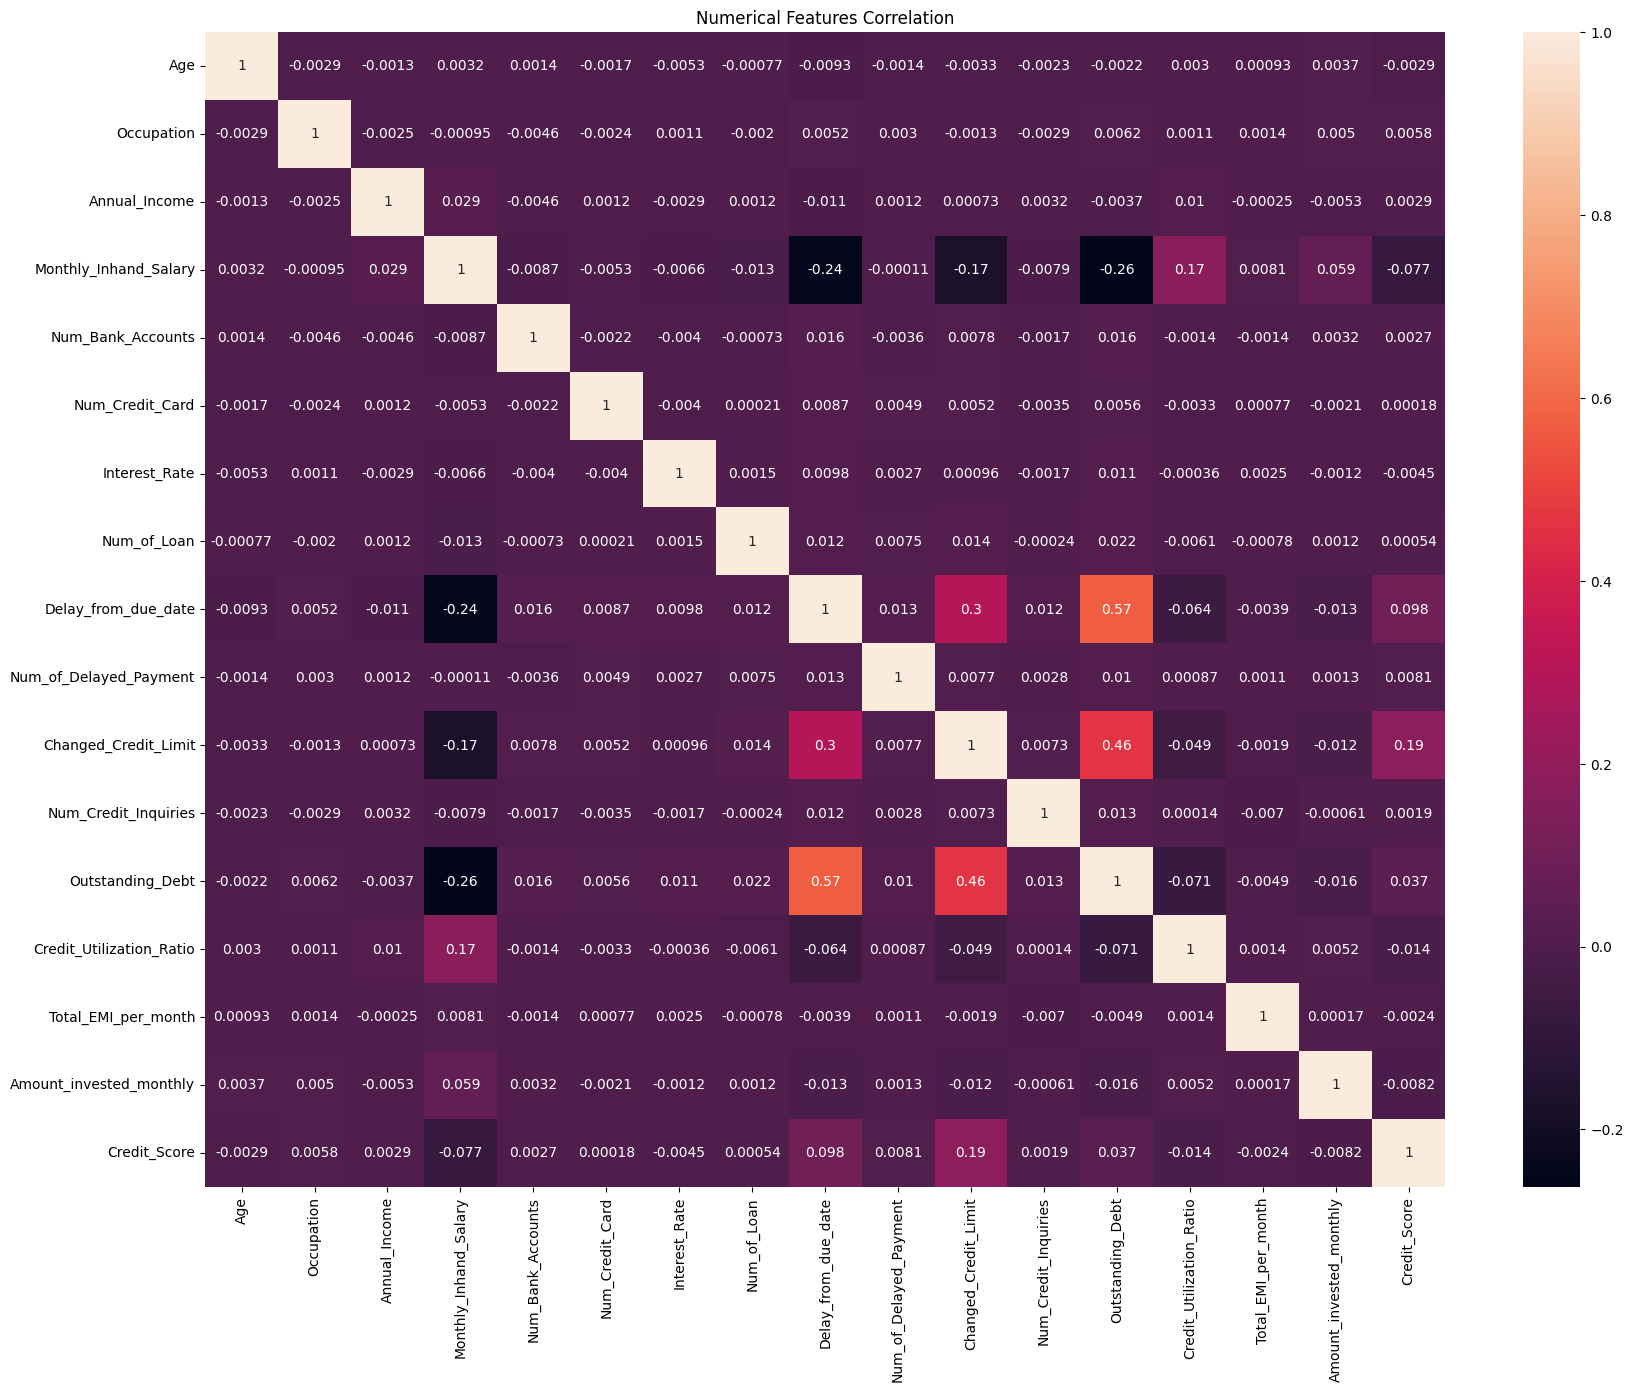

In [ ]:
corr_matrix = df1.corr()
plt.figure(figsize = (20, 15)) # creating the correlation heatmap
sns.heatmap(corr_matrix, annot = True)
plt.title('Numerical Features Correlation')
plt.show()

In [ ]:

# nalezy zmienic kolumne y (credit_score zamienic na 0 lub 1 - zrobic label encoder na nie)
le2 = LabelEncoder()
df1.Credit_Score = le2.fit_transform(df1.Credit_Score)
df1.Credit_Score.head()
corr_matrix.columns


Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_Score'],
      dtype='object')

In [ ]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,0


In [ ]:
print(df1.Credit_Score.unique())

['Good' 'Standard' 'Poor']


In [ ]:
cor_target = abs(corr_matrix["Credit_Score"])
relevant_features = cor_target[cor_target>0.01]
relevant_features

Monthly_Inhand_Salary       0.077156
Delay_from_due_date         0.097893
Changed_Credit_Limit        0.189074
Outstanding_Debt            0.037153
Credit_Utilization_Ratio    0.014371
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
# df1 powinno byc bez y (credit_score)
filtered_pca = pca.fit_transform(df1)
print(pca.explained_variance_ratio_)
print(filtered_pca.components_)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
scaler = MinMaxScaler()
col_float = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']
for i in df1[col_float]:
  df1[i] = scaler.fit_transform(df1[[i]])
df1.head()

ValueError: could not convert string to float: '22 Years and 1 Months'

In [ ]:
df1['Credit_History_Age'].head()
# podziel kolumnę po tekście i przelicz na miesiące
df1['Credit_History_Age']= (df1["Credit_History_Age"].str.split(" ",expand=True)[0] +12*(df1["Credit_History_Age"].str.split(" ",expand=True)[3]))
df1['Credit_History_Age']=df1['Credit_History_Age'].astype(float)

In [ ]:
# Drop outlier by IQR calculation
Q1 = df1.Annual_Income.quantile(0.25)
Q3 = df1.Annual_Income.quantile(0.75)
IQR = Q3-Q1
df1 = df1.drop(df1.loc[df1['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df1 = df1.drop(df1.loc[df1['Annual_Income'] < (Q1-1.5 * IQR)].index)

In [ ]:
scaler= MinMaxScaler() # scaler= StandardScaler()
col_float= ['Age’, 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']
  for i in df1[col_float]:
            df1[i]=scaler.fit_transform(df1[[i]]) print(df1.head())

SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-44-fe04a935f2be>, line 2)